<a href="https://colab.research.google.com/github/N1ck1103/Sport-cars-vs-Muscle-cas/blob/main/Nick_Smiths_Copy_of_Hahn_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [69]:
%%capture 
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb
# %%capture means captures the stdout/stderr of a cell
#pip is a standard package manager used to install and maintain packages for Python
#import means to bring in so basically you just bring in all the these things from other applications 

In [70]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))
    #def means define GPU as data and wants to return a torch.tensor which is a multi dimensional matrix containing elements of a single data type 
    # meaning that it wants to return data, requires_grad meaning changes an existing flag in place 

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))
    #def means define GPU as data and wants to return a torch.tensor which is a multi dimensional matrix containing elements of a single data type 
    # meaning that it wants to return data, requires_grad meaning changes an existing flag in place 

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    #define plot as x 
    #fig means figure object to be used as a container for all the subplots
    #design of the chart  
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id
    # design of the google slides meaning the image 

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images
   # Wants to grab the google slides but only grab the images from them 
def load(image):
  #define load to image 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [71]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();
#this link is supposed to give you an idea of what your images are associated with by AI generated data 

In [72]:
url = "https://docs.google.com/presentation/d/1vuKL7Ayu6J3dKZAQT_ot8UH1tQk8aRANt3Xnm7g8t1Y/edit#slide=id.g19b8867b70f_0_14"
#url is assigned to a url that directs you to a google slide with a whole bunch of pictures of cars vs trucks 

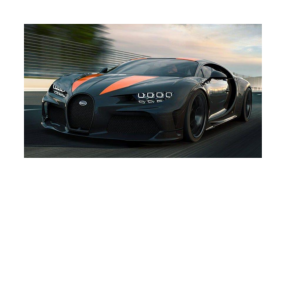

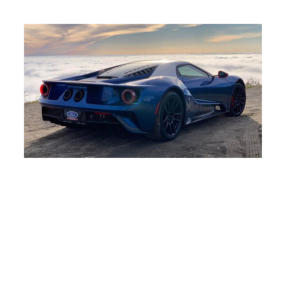

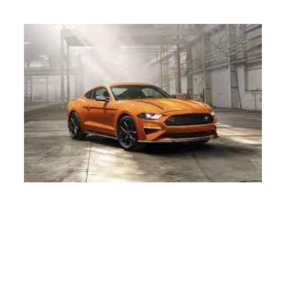

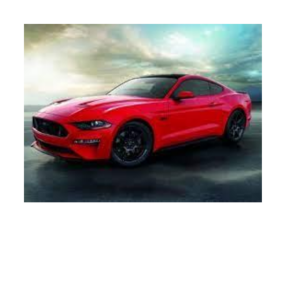

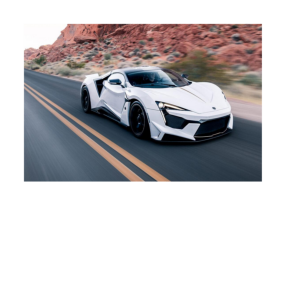

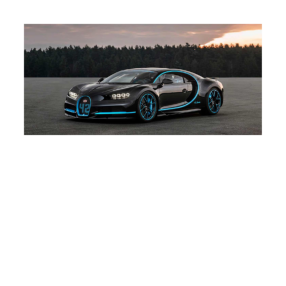

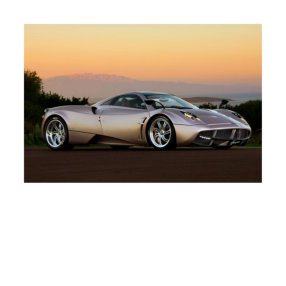

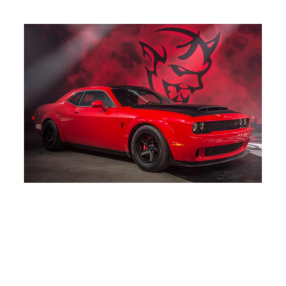

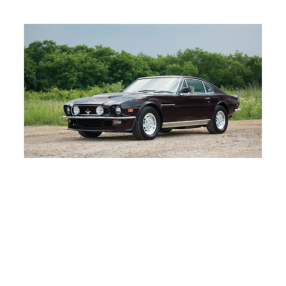

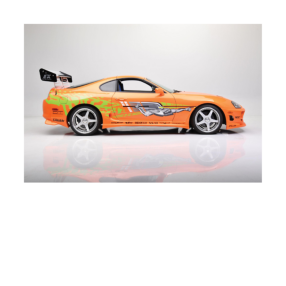

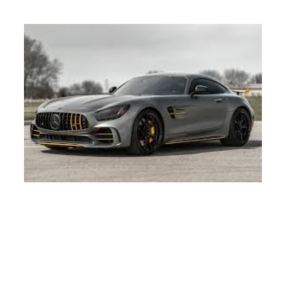

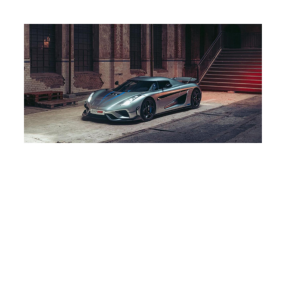

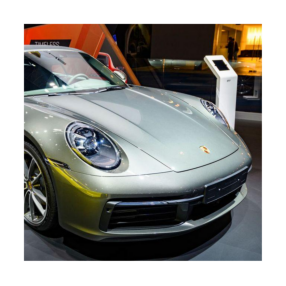

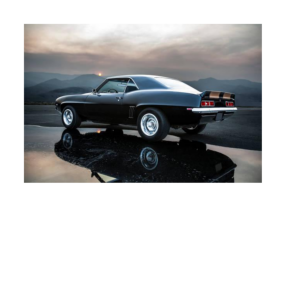

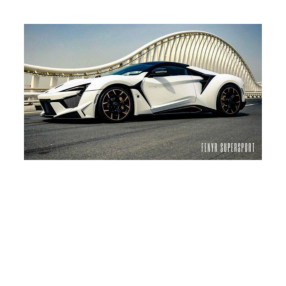

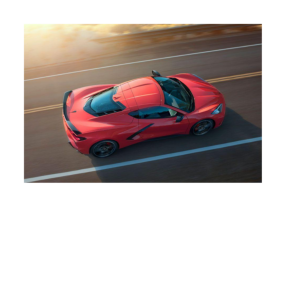

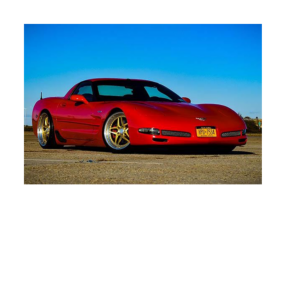

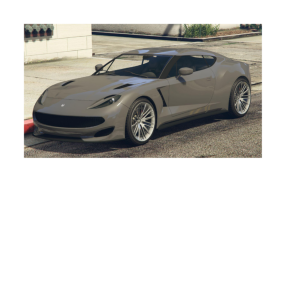

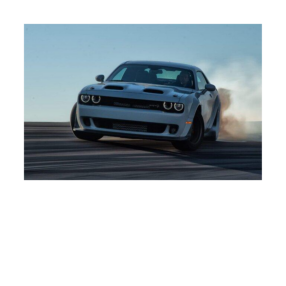

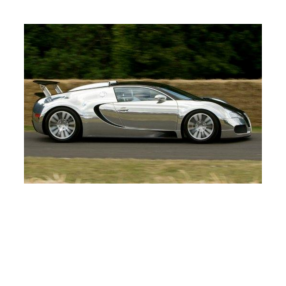

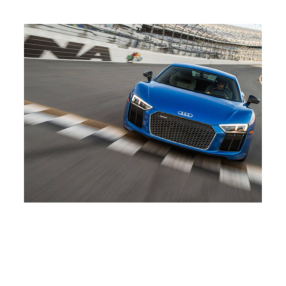

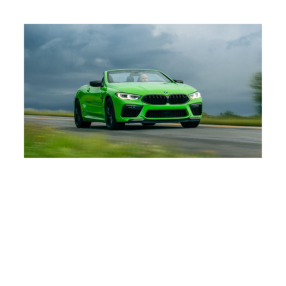

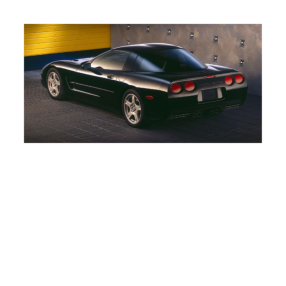

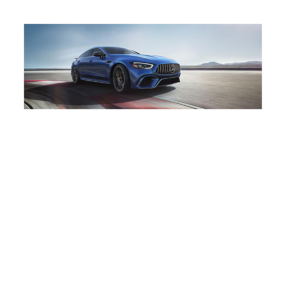

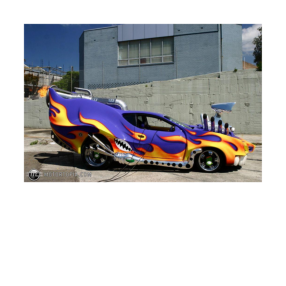

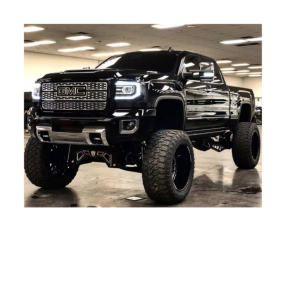

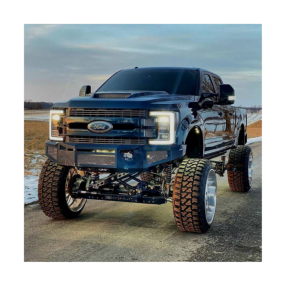

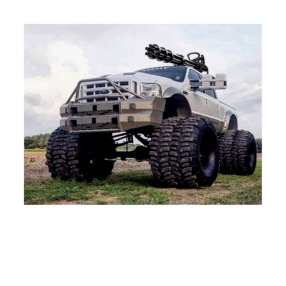

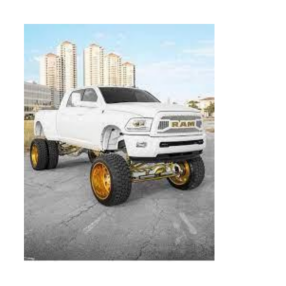

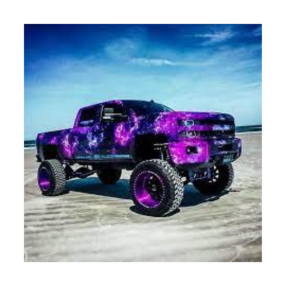

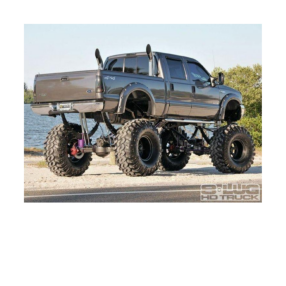

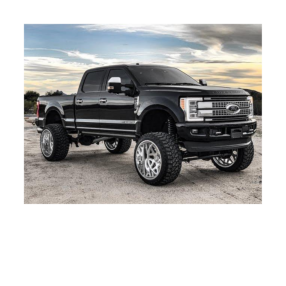

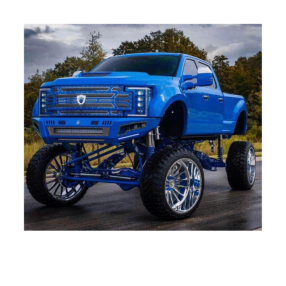

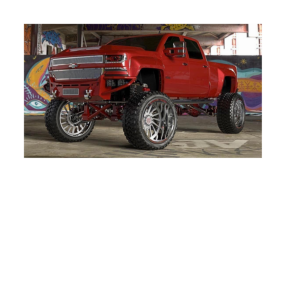

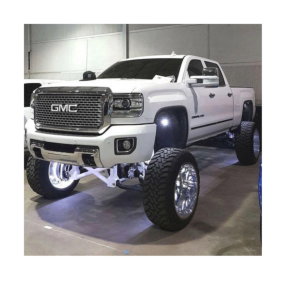

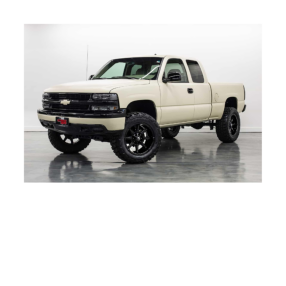

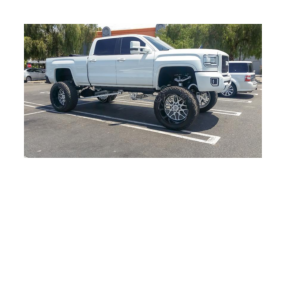

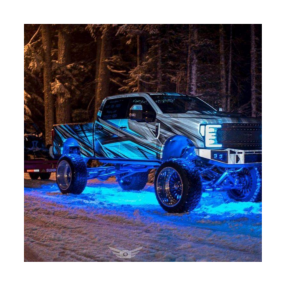

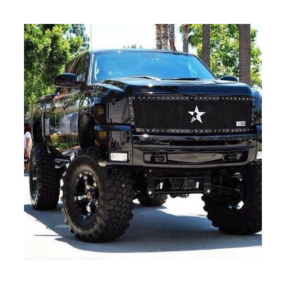

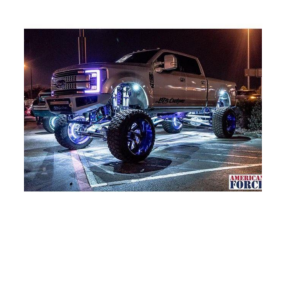

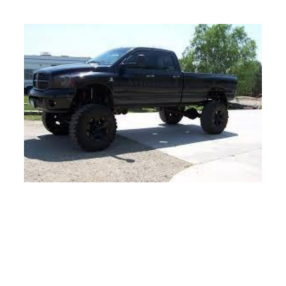

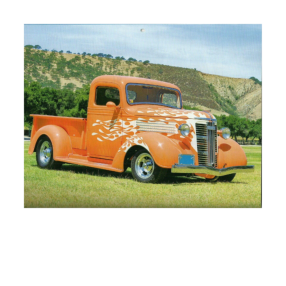

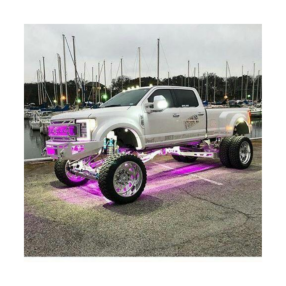

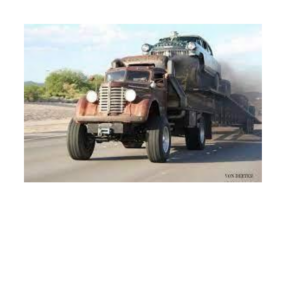

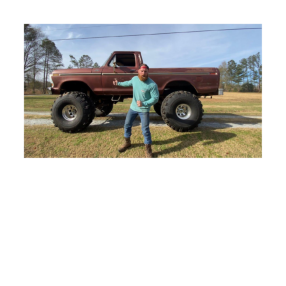

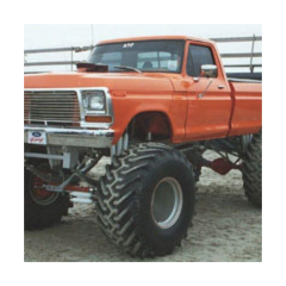

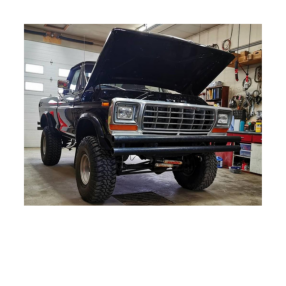

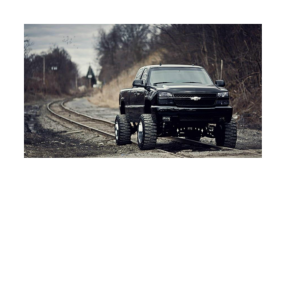

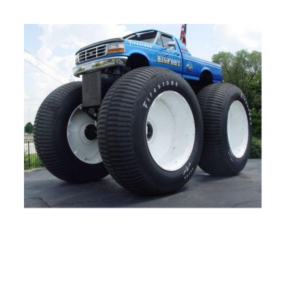

In [73]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)
#images of the slides that show us trucks vs cars 

In [74]:
images.shape
#The dimensions of a given image like the height of the image, width of the image and number of channels in the image

torch.Size([49, 3, 224, 224])

In [75]:
model(images)
#model is a python class

tensor([[-1.6952, -2.7152, -1.8757,  ..., -4.1172, -1.9997,  2.5390],
        [-0.5875, -3.5810, -2.2515,  ..., -3.3174, -1.0485,  2.9796],
        [-2.0678, -1.4634, -3.9244,  ..., -4.9403,  0.5830,  1.7253],
        ...,
        [-2.6446, -4.4825, -2.5771,  ..., -5.6263,  0.3332, -1.6682],
        [-1.2626, -5.0816, -3.7070,  ..., -4.8867, -0.2313,  0.4989],
        [-1.7653, -3.5723, -2.9987,  ..., -3.9906, -1.8320,  2.3957]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [76]:
y = model(images)
#assigning y to model(images)

In [77]:
y.shape 
#The dimensions of a given image like the height of the image, width of the image and number of channels in the image

torch.Size([49, 1000])

In [78]:
guesses = torch.argmax(y, 1).cpu().numpy()
#returns the indices of the maximum values of the input tensor across a specified dimension/axis
# .cpu means  CPU usage or utilization refers to the time taken by a computer to process some information. 
#.numpy means numerical python 

In [79]:
for i in list(guesses):
    print(labels[i])
    # this is the description of each car image or truck image 

sports car, sport car
sleeping bag
cab, hack, taxi, taxicab
sports car, sport car
screen, CRT screen
hair slide
convertible
car wheel
convertible
sports car, sport car
convertible
go-kart
sports car, sport car
sports car, sport car
racer, race car, racing car
plane, carpenter's plane, woodworking plane
sports car, sport car
convertible
sports car, sport car
sports car, sport car
harmonica, mouth organ, harp, mouth harp
tractor
CD player
hair slide
ambulance
reflex camera
jeep, landrover
half track
forklift
monitor
jeep, landrover
jeep, landrover
Model T
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
reflex camera
trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi
pickup, pickup truck
forklift
garbage truck, dustcart
screen, CRT screen
half track
pickup, pickup truck
go-kart
half track
tractor
jeep, landrover
snowplow, snowplough
cassette player
reflex camera


In [80]:
Y = np.zeros(50,)
Y[25:] = 1
# returns a new array of given shape and type where the element's value is 0 meaning anything under 25 is 1 

In [81]:
Y
#y is now called 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [82]:
X = y.detach().cpu().numpy() 
#creates a tensor that shares storage with tensor that does not require grad
#CPU usage or utilization refers to the time taken by a computer to process some information
#.numpy means that it goes by pythons numerical system 


In [83]:
X.shape
#The dimensions of a given image like the height of the image, width of the image and number of channels in the image

(49, 1000)

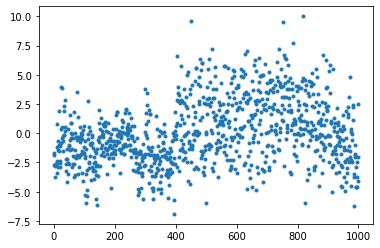

In [84]:
plt.plot(X[0],'.')
#plt.plot means to plot out on a graph and it wants to plot out x and '.' means it wants it in dots 

In [85]:
X[0]
#here are all the values printed out without a graph 

array([-1.69518685e+00, -2.71520877e+00, -1.87574291e+00, -3.76002073e+00,
       -2.71328807e+00, -2.79491210e+00, -2.61334586e+00, -2.66036153e+00,
       -2.66681814e+00, -3.38013220e+00, -2.34635282e+00,  8.18874896e-01,
       -1.20325279e+00, -2.89980912e+00, -6.85570061e-01, -1.45156956e+00,
       -1.52484238e+00,  1.93429375e+00, -9.65575457e-01, -1.08038664e+00,
       -2.90233636e+00, -2.53160548e+00, -2.35908461e+00,  3.61362636e-01,
       -8.75762999e-01,  3.96468186e+00,  5.18559933e-01, -4.01921749e-01,
        3.90874505e+00, -1.51888943e+00, -2.47555405e-01, -6.26384616e-01,
       -1.26341030e-01, -1.57795131e-01,  1.91881800e+00,  2.35735798e+00,
        2.80602145e+00,  5.27603686e-01,  2.33559996e-01, -3.21353579e+00,
       -2.65192080e+00, -2.17814302e+00, -1.31992471e+00, -4.21140766e+00,
       -2.21121740e+00,  3.58817995e-01, -2.54433966e+00, -3.48788929e+00,
       -2.58420134e+00, -1.11196136e+00, -2.64500904e+00, -9.79409337e-01,
       -5.43354750e-01,  

In [86]:
np.argmax(X[0])
#this returns the indices of the maximum values along an axis 

817

In [87]:
labels[948]
# this calls the array 948 which is the value below 

'Granny Smith'

In [88]:
top_ten = np.argsort(X[0])[::-1][0:10]
#top_ten is assigned to np.argsort meant to find the most occuring thing in the data 

In [89]:
for i in top_ten:
    print(labels[i])
    #most occuring values in the data 

sports car, sport car
bobsled, bobsleigh, bob
racer, race car, racing car
screwdriver
power drill
crash helmet
magnetic compass
lighter, light, igniter, ignitor
radio, wireless
vacuum, vacuum cleaner


In [90]:
labels #this is the value of all the data 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 14.,  55., 197., 262., 204., 127.,  90.,  40.,   8.,   3.]),
 array([-6.9051094 , -5.212857  , -3.5206046 , -1.8283521 , -0.13609962,
         1.5561528 ,  3.2484052 ,  4.9406576 ,  6.6329103 ,  8.325163  ,
        10.017415  ], dtype=float32),
 <a list of 10 Patch objects>)

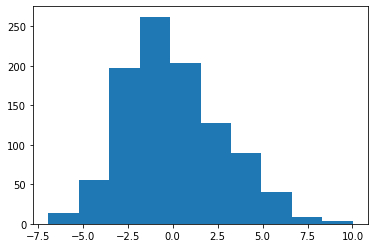

In [91]:
plt.hist(X[0])
# this is the data plotted on a bar graph 

In [92]:
X = GPU_data(X)
Y = GPU_data(Y)

In [93]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s
    #an activation function that is used mainly for classification tasks

In [94]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]
     #optimization function that is used for training classification models which classify the data by predicting the probability (value between 0 and 1) of whether the data belong to one class or another 

In [95]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)
    #creates an array of specified shape and fills it with random values as per standard normal distribution

In [96]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z
    # truncated_normal means a Python code which computes quantities associated with the truncated normal distribution

In [97]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [98]:
X.shape

torch.Size([49, 1000])

In [99]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [100]:
def model(x,w):

    return x@w[0]

In [101]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [102]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 

··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


<ipython-input-70-5e83e0c4bdfb>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/